Consider the set of event $A$ made of $M$ events $A_k$. Each event in $A$ is associated with the set $X$ made of $N$ conditional elements $x_i$ :

$$
A = \{ A_1, A_2, \cdot\cdot\cdot , A_{M} \} \\
X = \{ x_1, x_2, \cdot\cdot\cdot , x_{N} \}
$$

such that $P(A|x_{i})$ reads as *probility of event $A$ given condition $x_{i}$*

Baye's Theorem says:

$$
P(A_{k}~|x_{i}) = \frac{ P (x_{i}~|A_{k}) P(x_{i}) }{P(x_i)},
$$

however we also know *Sum Rule*:

$$
P(x_i) = \sum_{j=1}^{M}P(x_i~|A_j)P(A_j).
$$

Hence we can rewrite Baye's Theorem as:

$$
P(A~|x_{i}) = \frac{ P (x_{i}~|A_{k}) P(x_{i}) }{\sum_{j=1}^{M}P(x_i~|A_j)P(A_j)}.
$$

# **COVID 19 TEST EXAMPLE:**

*Note:* We are going to generalize this example by using the place holder variables $\alpha, \beta, \gamma$ for the actual numerical values.

The set events $A$ is formed by the elemets $C$ and $NC$ (having the virus and not having the virus. Each event is associated with the conditional elements $+$ and $-$ (testing positive and testing negative.


$P(C) = \alpha~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$- probability of having the virus

$P(NC) = 1 - P(C) = 1- \alpha~~~~~~~~~~~~~$        - probability of not having the virus

$P(+|C) = \beta~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ - probability of testing positive and having the virus 

$P(-|C)  = 1- \beta ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ - probability of testing negative and having the virus (i.e. false negative)

$P(+|NC) = 1- \gamma~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ - probability of testing positive and not having the virus (i.e. false positive)

$P(-|NC) = \gamma ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ - probability of testing negative and not having the virus 


# The knowns:

A percentage $\alpha~\%$ of the population has the virus: $P(C) = \alpha$.

The test`s reliability (hit) is $\beta ~\%~~~~~~~~~$: $P(+|C) = \beta$

The test`s correct rejection is $\gamma~\%~~~~~$: $P(-|NC) = \gamma$

# The question/unknown quantity:

What is the probability of having the virus given a positive test result?

$P(C|+)~ =~ ?$

In [1]:
# import packages

# computational packages
import numpy as np

# plotting packages
import matplotlib.pyplot as plt

In [2]:
# defining functions

def Bayes(P_c, P_pos_c, P_neg_nc):

    P_nc = 1 - P_c # 1-alpha

    P_pos_nc = 1 - P_neg_nc # 1-gamma

    P_pos = P_pos_c * P_c + P_pos_nc * P_nc # summation rule

    P_c_pos = ( P_pos_c * P_c) / P_pos # Baye`s theorem

    return P_c_pos

In [3]:
# In this section we are going to perform the computational part of this notebook

# For start, we are going to let the user input the necessary percentage data

alpha  = float( input("What is the percentage of people that have the virus? ") ) # the function input returns a string that is transformed into a number by the command float
while alpha > 1.0:
    alpha  = float( input(" Divide your number by 100 and then retype it. \n What is the percentage of people that have the virus? ") ) # we want to use numbers less than or equal to one due to the normalization requirement

beta   = float( input("What is the test's reliability (hit)? ") )
while beta > 1.0:
    beta  = float( input(" Divide your number by 100 and then retype it. \n What is the test's reliability (hit)? ") )

gamma   = float( input("What is the test`s correct rejection? ") )
while gamma > 1.0:
    gamma  = float( input(" Divide your number by 100 and then retype it. \n What is the test`s correct rejection? ") )

# call the Baye's function to return the probability of having the virus given a positive test result

P_c_pos = Bayes( alpha , beta, gamma )

print('\nThe probability of having the virus given a positive test result is : {0:.4g} %'.format(P_c_pos*100, ) )

What is the percentage of people that have the virus?  3
 Divide your number by 100 and then retype it. 
 What is the percentage of people that have the virus?  0.03
What is the test's reliability (hit)?  82
 Divide your number by 100 and then retype it. 
 What is the test's reliability (hit)?  0.82
What is the test`s correct rejection?  0.75



The probability of having the virus given a positive test result is : 9.21 %


In [4]:
# Next let's consider the probability of having the virus given a positive test result for a wide range of reliabilities

beta_list = np.arange(0.75, 1.01, 0.01) # create a list of values from 0.75 to 1.01 in steps of 0.01
gamma_list = np.arange(1.00, 0.74, -0.01)

P_c_pos_list = []

for gamma in gamma_list:
    P_c_pos_list.append(Bayes( alpha , beta_list, gamma )) # notice that our function can take both single numbers and list as its arguments

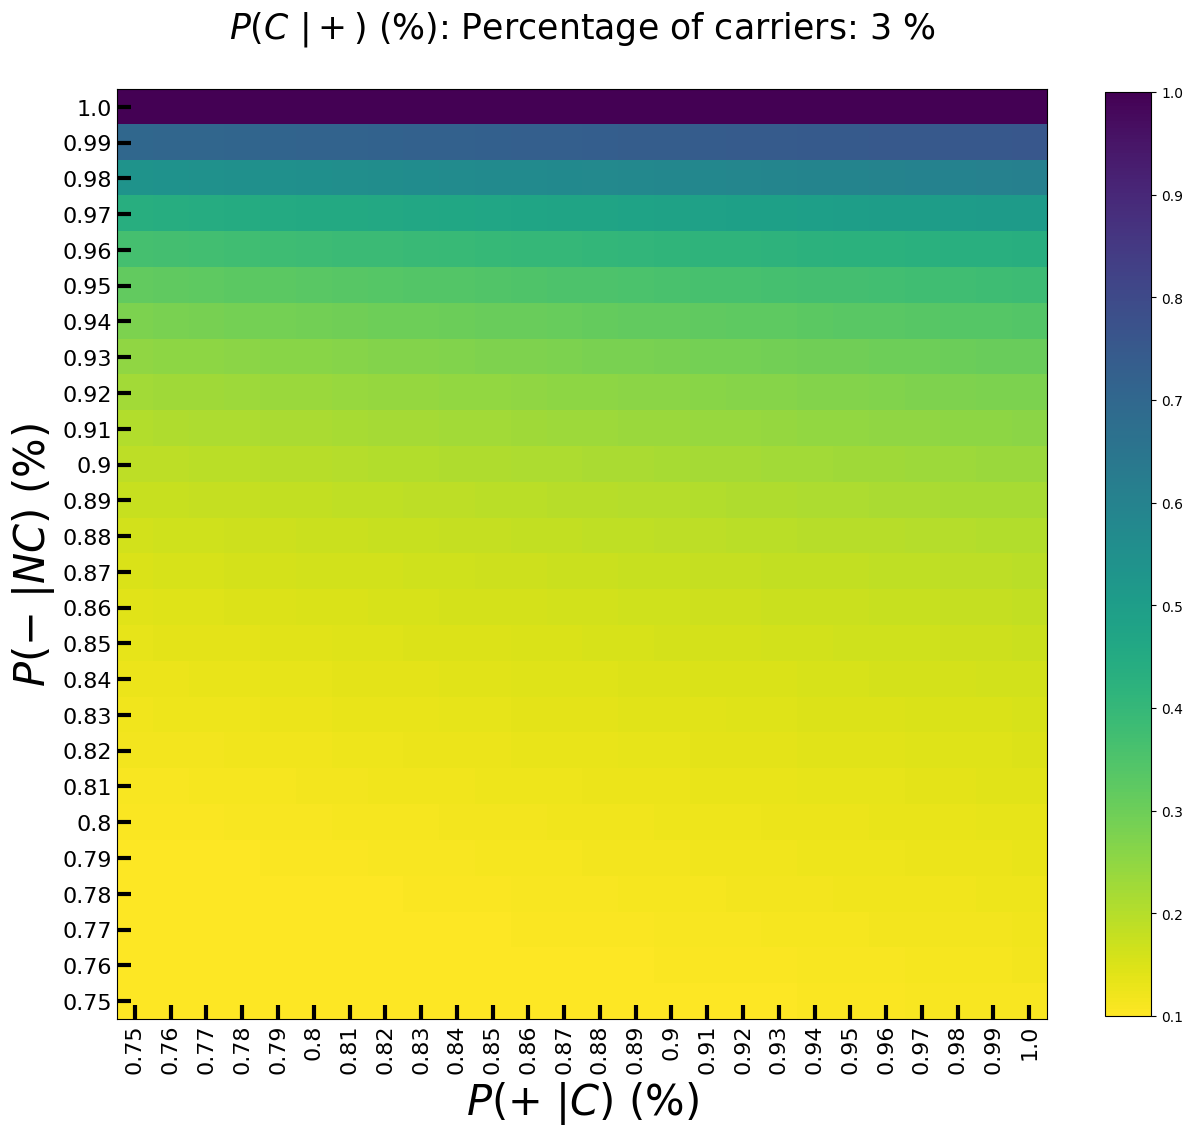

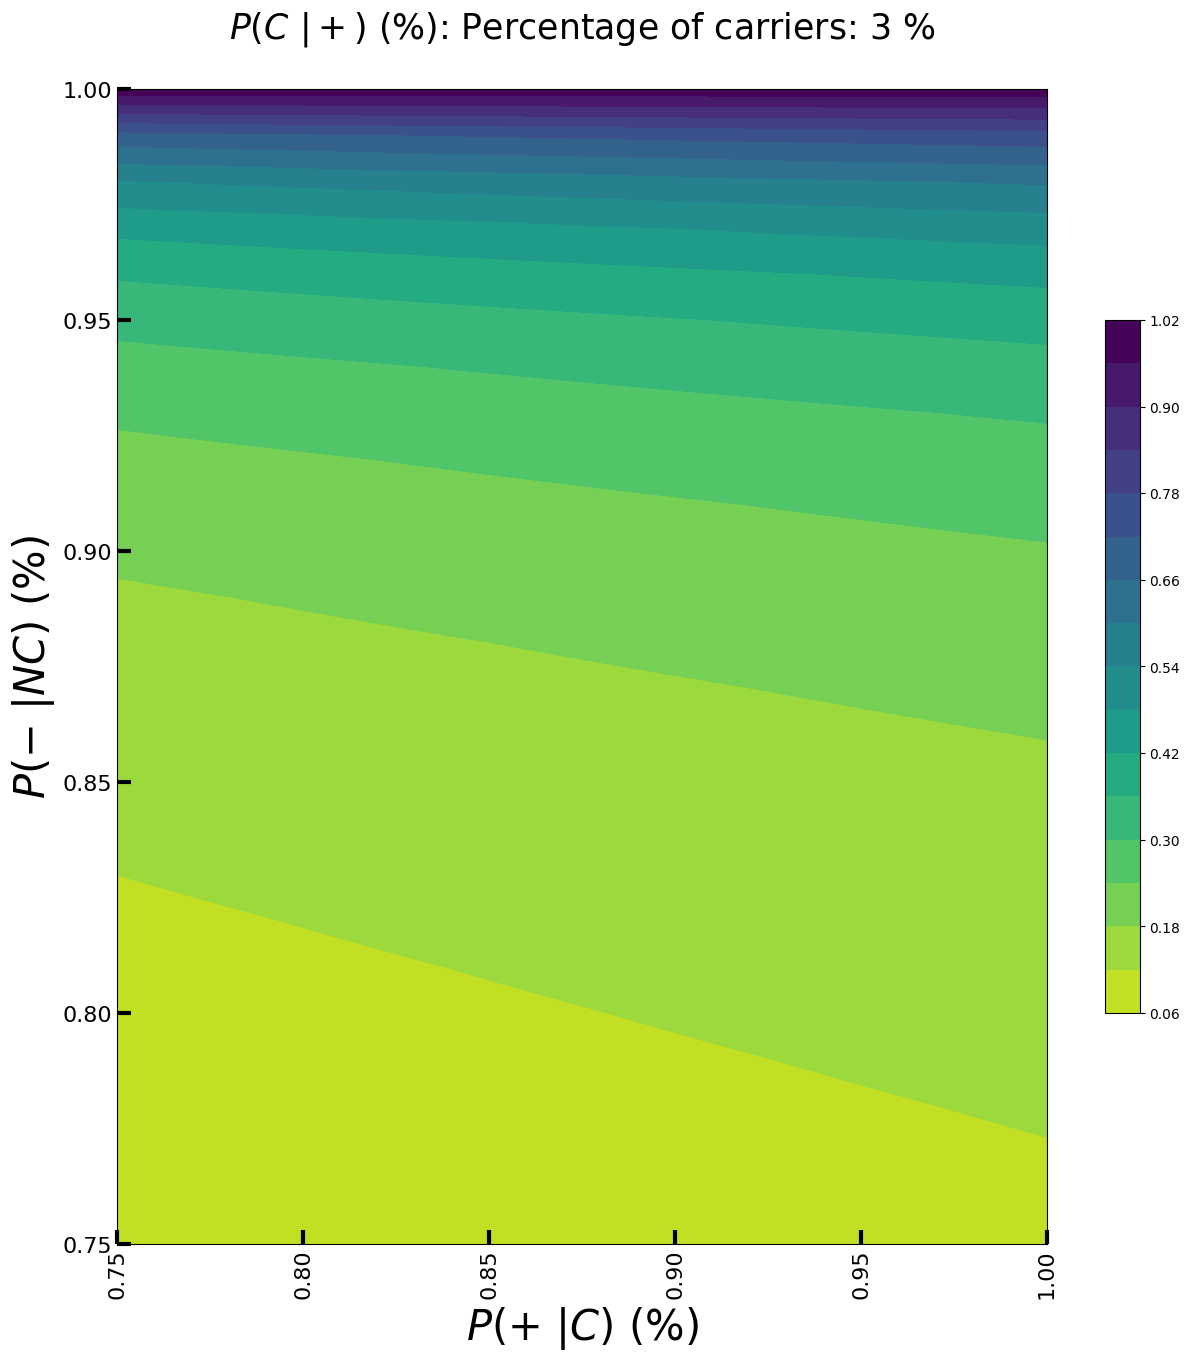

In [5]:


# Plotting results

###########################
#####  RAW Results
###########################



plt.figure(figsize = (15,20))


plt.imshow(P_c_pos_list, cmap = plt.cm.viridis_r, vmin=0.1, vmax=1.0)
plt.colorbar(shrink = 0.6)

plt.xticks( np.arange(len(beta_list)) , np.round(beta_list,2) )
plt.yticks( np.arange(len(gamma_list)) , np.round(gamma_list,2) ) 

plt.xlabel('$P(+~|C)$ (%)', fontsize=30)
plt.ylabel('$P(-~|NC)$ (%)', fontsize=30)

plt.title("$P(C~|+)$ (%): Percentage of carriers: {0:.4g} %\n".format(alpha*100, ), fontsize = 25)


plt.tick_params(direction='in', length=10, width=3)
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16, rotation=0)


#plt.savefig("/home/nistrate/[Destination]/[name].png")


plt.show()

#########################################################
## Contour Plot
#############################

plt.figure(figsize = (15,15))


plt.contourf(beta_list, gamma_list, P_c_pos_list , 15, cmap = plt.cm.viridis_r, vmin=0.0, vmax=1.0, origin='lower')
plt.colorbar(shrink = 0.6)

# plt.xticks( np.arange(len(beta_list)) , np.round(beta_list,2) )
# plt.yticks( np.arange(len(gamma_list)) , np.round(gamma_list,2) ) 

plt.xlabel('$P(+~|C)$ (%)', fontsize=30)
plt.ylabel('$P(-~|NC)$ (%)', fontsize=30)

plt.title("$P(C~|+)$ (%): Percentage of carriers: {0:.4g} %\n".format(alpha*100, ), fontsize = 25)


plt.tick_params(direction='in', length=10, width=3)
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16, rotation=0)


#plt.savefig("/home/nistrate/[Destination]/[name].png")


plt.show()




In [7]:
# Enhanced Interactive Visualization with Plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display

# Create interactive widgets for parameter control
def create_interactive_bayes():
    """Create an interactive Bayes' theorem calculator with enhanced visualizations"""
    
    # Widgets for parameter control
    alpha_widget = widgets.FloatSlider(
        value=0.004, min=0.001, max=0.1, step=0.001,
        description='Virus Prevalence (α):',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='400px')
    )
    
    beta_widget = widgets.FloatSlider(
        value=0.95, min=0.5, max=1.0, step=0.01,
        description='Test Sensitivity (β):',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='400px')
    )
    
    gamma_widget = widgets.FloatSlider(
        value=0.95, min=0.5, max=1.0, step=0.01,
        description='Test Specificity (γ):',
        style={'description_width': 'initial'},
        layout=widgets.Layout(width='400px')
    )
    
    def update_visualization(alpha, beta, gamma):
        """Update the visualization based on widget values"""
        
        # Calculate probabilities
        P_c = alpha
        P_nc = 1 - alpha
        P_pos_c = beta
        P_neg_c = 1 - beta
        P_pos_nc = 1 - gamma
        P_neg_nc = gamma
        
        P_pos = P_pos_c * P_c + P_pos_nc * P_nc
        P_c_pos = (P_pos_c * P_c) / P_pos
        
        # Create subplots with compatible chart types
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=[
                'Probability Flow Diagram',
                'Parameter Sensitivity Heatmap',
                'Posterior Probability vs Parameters',
                'Test Performance Metrics'
            ],
            specs=[[{"type": "scatter"}, {"type": "heatmap"}],
                   [{"type": "scatter"}, {"type": "bar"}]]
        )
        
        # 1. Probability Flow Visualization (using scatter plot)
        # Create a flow diagram showing probability paths
        flow_data = {
            'x': [0, 0, 1, 1, 2, 2, 2, 2],
            'y': [0, 0, 0.5, -0.5, 0.75, 0.25, -0.25, -0.75],
            'labels': ['Population', '', 'Has Virus', 'No Virus', 'Test +', 'Test -', 'Test +', 'Test -'],
            'probabilities': [1.0, P_c, P_nc, P_pos_c, P_neg_c, P_pos_nc, P_neg_nc],
            'colors': ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray']
        }
        
        fig.add_trace(
            go.Scatter(
                x=flow_data['x'],
                y=flow_data['y'],
                mode='markers+text',
                text=flow_data['labels'],
                textposition='middle center',
                marker=dict(
                    size=[50, 30, 30, 30, 25, 25, 25, 25],
                    color=flow_data['colors'],
                    opacity=0.7
                ),
                name='Probability Flow',
                hovertemplate='<b>%{text}</b><br>Probability: %{marker.size}<extra></extra>'
            ),
            row=1, col=1
        )
        
        # Add arrows to show flow
        for i in range(len(flow_data['x'])-1):
            if i < 2:  # From population to virus states
                fig.add_annotation(
                    x=0.5, y=0.1,
                    ax=0, ay=0,
                    xref="x", yref="y",
                    axref="x", ayref="y",
                    showarrow=True,
                    arrowhead=2,
                    arrowsize=1,
                    arrowwidth=2,
                    arrowcolor="black"
                )
        
        # 2. Parameter Sensitivity Heatmap
        beta_range = np.linspace(0.5, 1.0, 20)
        gamma_range = np.linspace(0.5, 1.0, 20)
        
        P_c_pos_grid = np.zeros((len(gamma_range), len(beta_range)))
        for i, g in enumerate(gamma_range):
            for j, b in enumerate(beta_range):
                P_c_pos_grid[i, j] = Bayes(alpha, b, g)
        
        fig.add_trace(
            go.Heatmap(
                z=P_c_pos_grid,
                x=beta_range,
                y=gamma_range,
                colorscale='Viridis',
                colorbar=dict(title="P(C|+)"),
                hovertemplate='Sensitivity: %{x:.2f}<br>Specificity: %{y:.2f}<br>P(C|+): %{z:.3f}<extra></extra>'
            ),
            row=1, col=2
        )
        
        # 3. Posterior Probability vs Parameters
        beta_vals = np.linspace(0.5, 1.0, 50)
        P_c_pos_vals = [Bayes(alpha, b, gamma) for b in beta_vals]
        
        fig.add_trace(
            go.Scatter(
                x=beta_vals,
                y=P_c_pos_vals,
                mode='lines',
                name=f'P(C|+) vs Sensitivity',
                line=dict(color='red', width=3),
                hovertemplate='Sensitivity: %{x:.2f}<br>P(C|+): %{y:.3f}<extra></extra>'
            ),
            row=2, col=1
        )
        
        # Add current point
        fig.add_trace(
            go.Scatter(
                x=[beta],
                y=[P_c_pos],
                mode='markers',
                name='Current Point',
                marker=dict(color='red', size=10, symbol='star'),
                hovertemplate=f'Current: β={beta:.2f}, P(C|+)={P_c_pos:.3f}<extra></extra>'
            ),
            row=2, col=1
        )
        
        # 4. Test Performance Metrics
        metrics = ['Sensitivity', 'Specificity', 'PPV', 'NPV', 'Accuracy']
        values = [beta, gamma, P_c_pos, (P_neg_nc * P_nc) / (P_neg_nc * P_nc + P_neg_c * P_c), 
                 (P_pos_c * P_c + P_neg_nc * P_nc)]
        
        fig.add_trace(
            go.Bar(
                x=metrics,
                y=values,
                marker_color=['blue', 'green', 'red', 'orange', 'purple'],
                hovertemplate='%{x}: %{y:.3f}<extra></extra>'
            ),
            row=2, col=2
        )
        
        # Update layout
        fig.update_layout(
            height=800,
            title_text=f"Interactive Bayes' Theorem Analysis<br><sub>Current P(C|+): {P_c_pos:.3f} ({P_c_pos*100:.1f}%)</sub>",
            showlegend=False
        )
        
        # Update axes labels
        fig.update_xaxes(title_text="Test Sensitivity (β)", row=2, col=1)
        fig.update_yaxes(title_text="P(C|+)", row=2, col=1)
        
        # Set axis ranges for better visualization
        fig.update_xaxes(range=[0, 1], row=1, col=1)
        fig.update_yaxes(range=[-1, 1], row=1, col=1)
        
        fig.show()
        
        # Print summary statistics
        print(f"\n{'='*60}")
        print(f"BAYESIAN ANALYSIS SUMMARY")
        print(f"{'='*60}")
        print(f"Virus Prevalence (α):     {alpha:.3f} ({alpha*100:.1f}%)")
        print(f"Test Sensitivity (β):     {beta:.3f} ({beta*100:.1f}%)")
        print(f"Test Specificity (γ):     {gamma:.3f} ({gamma*100:.1f}%)")
        print(f"{'='*60}")
        print(f"PRIOR PROBABILITIES:")
        print(f"P(Has Virus):            {P_c:.3f} ({P_c*100:.1f}%)")
        print(f"P(No Virus):             {P_nc:.3f} ({P_nc*100:.1f}%)")
        print(f"{'='*60}")
        print(f"LIKELIHOODS:")
        print(f"P(Test + | Has Virus):    {P_pos_c:.3f} ({P_pos_c*100:.1f}%)")
        print(f"P(Test - | Has Virus):    {P_neg_c:.3f} ({P_neg_c*100:.1f}%)")
        print(f"P(Test + | No Virus):     {P_pos_nc:.3f} ({P_pos_nc*100:.1f}%)")
        print(f"P(Test - | No Virus):     {P_neg_nc:.3f} ({P_neg_nc*100:.1f}%)")
        print(f"{'='*60}")
        print(f"POSTERIOR PROBABILITIES:")
        print(f"P(Has Virus | Test +):    {P_c_pos:.3f} ({P_c_pos*100:.1f}%)")
        print(f"P(No Virus | Test -):     {(P_neg_nc * P_nc) / (P_neg_nc * P_nc + P_neg_c * P_c):.3f}")
        print(f"{'='*60}")
        print(f"TEST PERFORMANCE:")
        print(f"Positive Predictive Value: {P_c_pos:.3f} ({P_c_pos*100:.1f}%)")
        print(f"Negative Predictive Value: {(P_neg_nc * P_nc) / (P_neg_nc * P_nc + P_neg_c * P_c):.3f}")
        print(f"Overall Accuracy:         {(P_pos_c * P_c + P_neg_nc * P_nc):.3f}")
        print(f"{'='*60}")
    
    # Create interactive widget
    interactive_plot = widgets.interactive_output(
        update_visualization,
        {'alpha': alpha_widget, 'beta': beta_widget, 'gamma': gamma_widget}
    )
    
    # Display widgets
    display(widgets.VBox([
        widgets.HTML("<h3>Interactive Bayes' Theorem Calculator</h3>"),
        widgets.HTML("<p>Adjust the parameters below to see how they affect the probability calculations:</p>"),
        alpha_widget,
        beta_widget,
        gamma_widget,
        interactive_plot
    ]))

# Run the interactive visualization
create_interactive_bayes()
